<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/4_svc_knn_ifoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

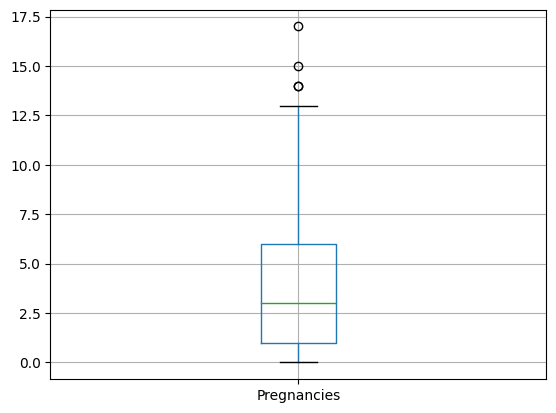

In [ ]:
df.boxplot(column='Pregnancies')

<Axes: >

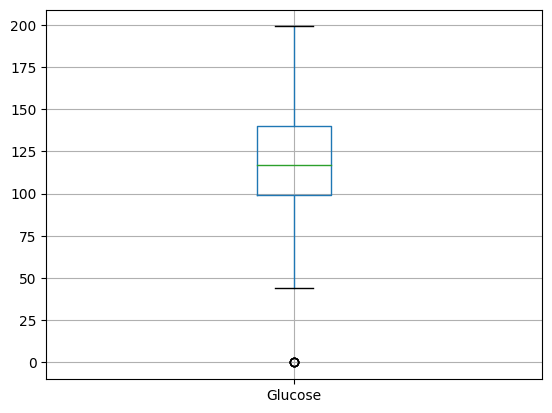

In [ ]:
df.boxplot(column='Glucose')

<Axes: >

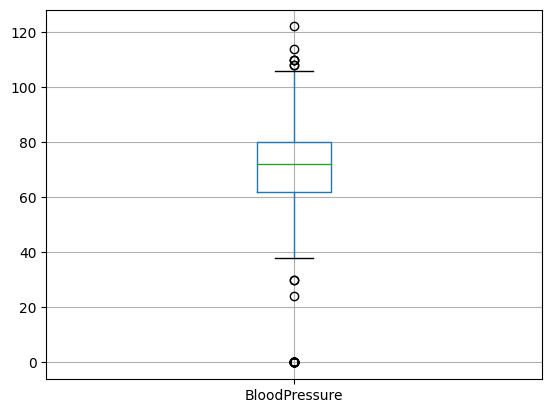

In [ ]:
df.boxplot(column='BloodPressure')

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Dividere dataset in training e test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
X_train_std.min()

-4.199516668602289

In [ ]:
X_train_std.max()

6.593351272269331

In [ ]:
X_train_std.min(axis=0)

array([-1.13284707, -3.75825205, -3.78077929, -1.32985833, -0.69205168,
       -4.19951667, -1.15216263, -1.03690611])

In [ ]:
X_train_std.max(axis=0)

array([4.01464178, 2.44010598, 2.85548703, 2.75806196, 6.59335127,
       4.61136407, 5.75577427, 4.18159907])

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## KNN senza standardizzazione

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print(train_acc)
print(test_acc)

0.8472222222222222
0.640625


In [ ]:
train_prec = precision_score(y_train, y_train_pred)
test_prec = precision_score(y_test,y_test_pred)
print(train_prec)
print(test_prec)

0.8135593220338984
0.5


In [ ]:
train_rec= recall_score(y_train, y_train_pred)
test_rec = recall_score(y_test,y_test_pred)
print(train_rec)
print(test_rec)

0.7236180904522613
0.5797101449275363


In [ ]:
train_f1= f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test,y_test_pred)
print(train_f1)
print(test_f1)

0.7659574468085107
0.5369127516778525


## knn con standardizzazione

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

In [ ]:
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print(train_acc)
print(test_acc)

0.8645833333333334
0.6770833333333334


In [ ]:
0.86-0.67

0.18999999999999995

In [ ]:
def stampo_metriche(y,previsioni):
  # stampo le metriche del modello
  print('Accuracy: ',accuracy_score(y,previsioni))
  print('Precision: ',precision_score(y,previsioni))
  print('Recall: ',recall_score(y,previsioni))
  print('f1 score: ',f1_score(y,previsioni))

In [ ]:
 stampo_metriche(y_train,y_train_pred)

0.8645833333333334
0.8379888268156425
0.7537688442211056
0.7936507936507937


In [ ]:
 stampo_metriche(y_test,y_test_pred)

0.6770833333333334
0.559322033898305
0.4782608695652174
0.515625


In [ ]:
l_f1score = []
for k in range(1,20):
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train_std,y_train)
   y_test_pred = knn.predict(X_test_std)
   f1score = f1_score(y_test,y_test_pred)
   l_f1score.append(f1score)

In [ ]:
import matplotlib.pyplot as plt

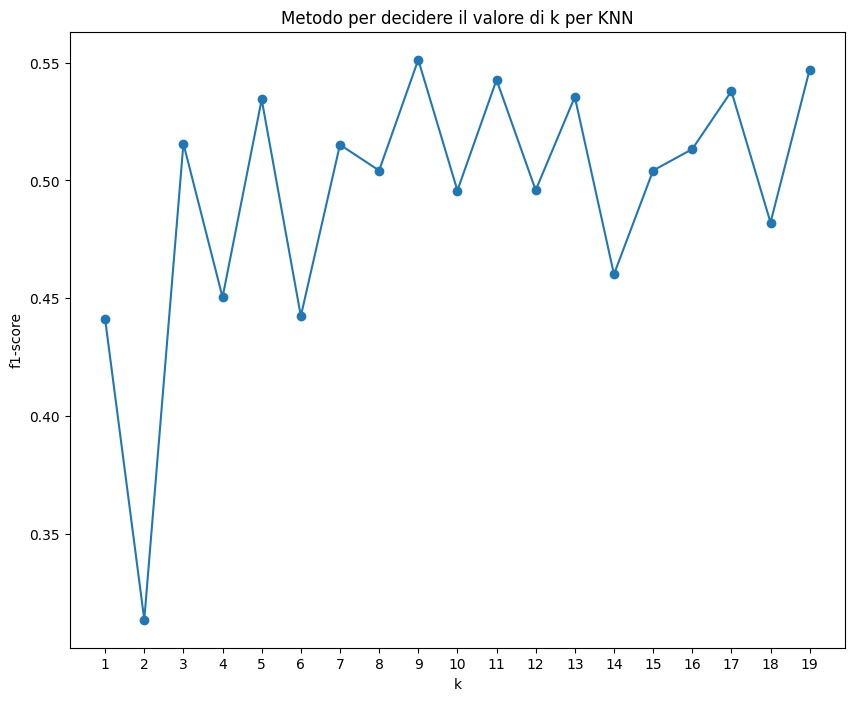

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Metodo per decidere il valore di k per KNN')
plt.plot(range(1,20),l_f1score,marker='o')
plt.xlabel('k')
plt.ylabel('f1-score')
plt.xticks(range(1,20))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

In [ ]:
stampo_metriche(y_train,y_train_pred)

0.8159722222222222
0.7961783439490446
0.628140703517588
0.7022471910112361


In [ ]:
stampo_metriche(y_test,y_test_pred)

0.703125
0.603448275862069
0.5072463768115942
0.5511811023622047


In [ ]:
y_train.value_counts()

0    377
1    199
Name: Outcome, dtype: int64

In [ ]:
y_test.value_counts()

0    123
1     69
Name: Outcome, dtype: int64

## KNN con k fold cross validation

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold

In [ ]:
#kf = KFold(n_splits=5)
kf = StratifiedKFold(n_splits=5)

In [ ]:
kf = StratifiedKFold(n_splits=5)

l_precision = []
l_recall = []
l_precision_train = []
l_recall_train = []

for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]

    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    ## normalizzaziamo le features
    scaler = StandardScaler()

    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)
    ## inizializzo il modello
    knn = KNeighborsClassifier(n_neighbors=9)
    ## alleno il modello
    knn.fit(X_train_std,y_train)
    ## ottengo le previsioni
    y_train_pred = knn.predict(X_train_std)
    y_test_pred = knn.predict(X_test_std)

    l_precision_train.append(precision_score(y_train,y_train_pred))
    l_recall_train.append(recall_score(y_train,y_train_pred))
    l_precision.append(precision_score(y_test,y_test_pred))
    l_recall.append(recall_score(y_test,y_test_pred))

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


In [ ]:
## precision score nel training set
print(np.array(l_precision_train).mean())
## precision score nel test set
print(np.array(l_precision).mean())
## precision score nel training set
print(np.array(l_recall_train).mean())
## precision score nel test set
print(np.array(l_recall).mean())

0.732676185478199

## SVC

In [ ]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

In [ ]:
stampo_metriche(y_train,y_train_pred_svc)

Accuracy:  0.78125
Precision:  0.7449664429530202
Recall:  0.5577889447236181
f1 score:  0.6379310344827586


In [ ]:
stampo_metriche(y_test,y_test_pred_svc)

Accuracy:  0.7291666666666666
Precision:  0.6197183098591549
Recall:  0.6376811594202898
f1 score:  0.6285714285714286


In [ ]:
#svc = SVC(kernel='linear')
svc = SVC(kernel='linear')
svc.fit(X_train_std,y_train)

SVC(kernel='linear')

In [ ]:
y_train_pred_svc = svc.predict(X_train_std)
y_test_pred_svc = svc.predict(X_test_std)

In [ ]:
stampo_metriche(y_train,y_train_pred_svc)

Accuracy:  0.7853658536585366
Precision:  0.7610062893081762
Recall:  0.5627906976744186
f1 score:  0.6470588235294118


In [ ]:
stampo_metriche(y_test,y_test_pred_svc)

Accuracy:  0.7647058823529411
Precision:  0.717948717948718
Recall:  0.5283018867924528
f1 score:  0.6086956521739131


### SVC con lo stratified k fold cross validation

In [ ]:
kf = StratifiedKFold(n_splits=5)


l_precision = []
l_recall = []
l_precision_train = []
l_recall_train = []

for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]

    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    ## normalizzaziamo le features
    scaler = StandardScaler()

    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)
    ## inizializzo il modello
    svc = SVC(kernel='linear')
    ## alleno il modello
    knn.fit(X_train_std,y_train)
    ## ottengo le previsioni
    y_train_pred = knn.predict(X_train_std)
    y_test_pred = knn.predict(X_test_std)

    l_precision_train.append(precision_score(y_train,y_train_pred))
    l_recall_train.append(recall_score(y_train,y_train_pred))
    l_precision.append(precision_score(y_test,y_test_pred))
    l_recall.append(recall_score(y_test,y_test_pred))

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


In [ ]:
## precision score nel training set
print(np.array(l_precision_train).mean())
## precision score nel test set
print(np.array(l_precision).mean())
## precision score nel training set
print(np.array(l_recall_train).mean())
## precision score nel test set
print(np.array(l_recall).mean())

0.732676185478199
0.6621900471900473
0.6157226689850032
0.529979035639413
